 <table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Christoph Berke </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060">&Uuml;bungsblatt 10</h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2023</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Abgabe**: <span style="color:#82a8cf"> 12.6.2023, 12:00 Uhr </span> <span style="float:right;">**Besprechung**: 14.6.2023 - 16.6.2023.</span></font>

<font size="4" color="#606060">**Name**: <span style="color:#82a8cf"> Bitte geben Sie Ihren Namen an.  </span> </font>

<hr style="height:.3px"> 

<span style="color:#606060; font-weight:bold; font-size:20px"> Aufgaben auf Übungsblatt 10</span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 25:  Relaxen im Plattenkondensator [10 Punkte] </span>
- <span style="color:#82a8cf; font-weight:bold; font-size:16px"> Aufgabe 26: Spannende Sachen [10 Punkte]</span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 27 (Bonus): Pendeln im Potentialtopf [12 Bonus-Punkte] </span>

<hr style="height:.3px"> 

<table style="border-style: none; width: 100%; background-color: #FFFFFF"><tr style="border-style: none;">
<td style="border-style: none; width:1%; text-align: left; font-size: 25px; font-weight: 200;background-color: #FFFFFF">Aufgabe 26: Spannende Sachen</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px;background-color: #FFFFFF">[10 Punkte]</td></tr></table>

In dieser Aufgabe benutzen wir eine Variation des Relaxationsverfahren, das sogenannte **Überrelaxieren**, um zu einem festen, vorgegebenen Randprofil eine **minimale Oberfläche** zu finden.
Wir betrachten eine Fläche $A$, die als Funktion von zwei *diskreten* Koordinaten $x$ und $y$ beschrieben werden kann,  $A(x,y) \equiv A_{i,j}$. Ähnlich zum Relaxationsverfahren bilden wir in jedem Iterationsschritt an einer Position $(i,j)$ das arithmetische Mittel der umgebenden Punkte, um die Höhendifferenz zu den Nachbarpunkten zu verringern:

\begin{equation}
A^{(n+1)}_{i,j} = (1-\omega) A^{(n)}_{i,j} + \omega \frac14 \left( A^{(n+1)}_{i-1,j}+A^{(n)}_{i+1,j}+A^{(n+1)}_{i,j-1}+A^{(n)}_{i,j+1} \right)\,.
\end{equation}

Hier kommen aber zwei Besonderheiten hinzu: Zum einen wurde der Überrelaxationsparameter $\omega$ eingeführt, der die Änderungen zum letzten Iterationsschritt gewichtet. Zum anderen gehen auf der rechten Seite der Gleichung teilweise *bereits iterierte* Werte (die $A^{n+1}$) mit ein, so wie in der untenstehenden Skizze erläutert. Pfeile zeigen an, welche Einträge bei der Bildung des Mittelwertes zum Update der schwarz eingezeichneten Matrixposition genutzt werden.

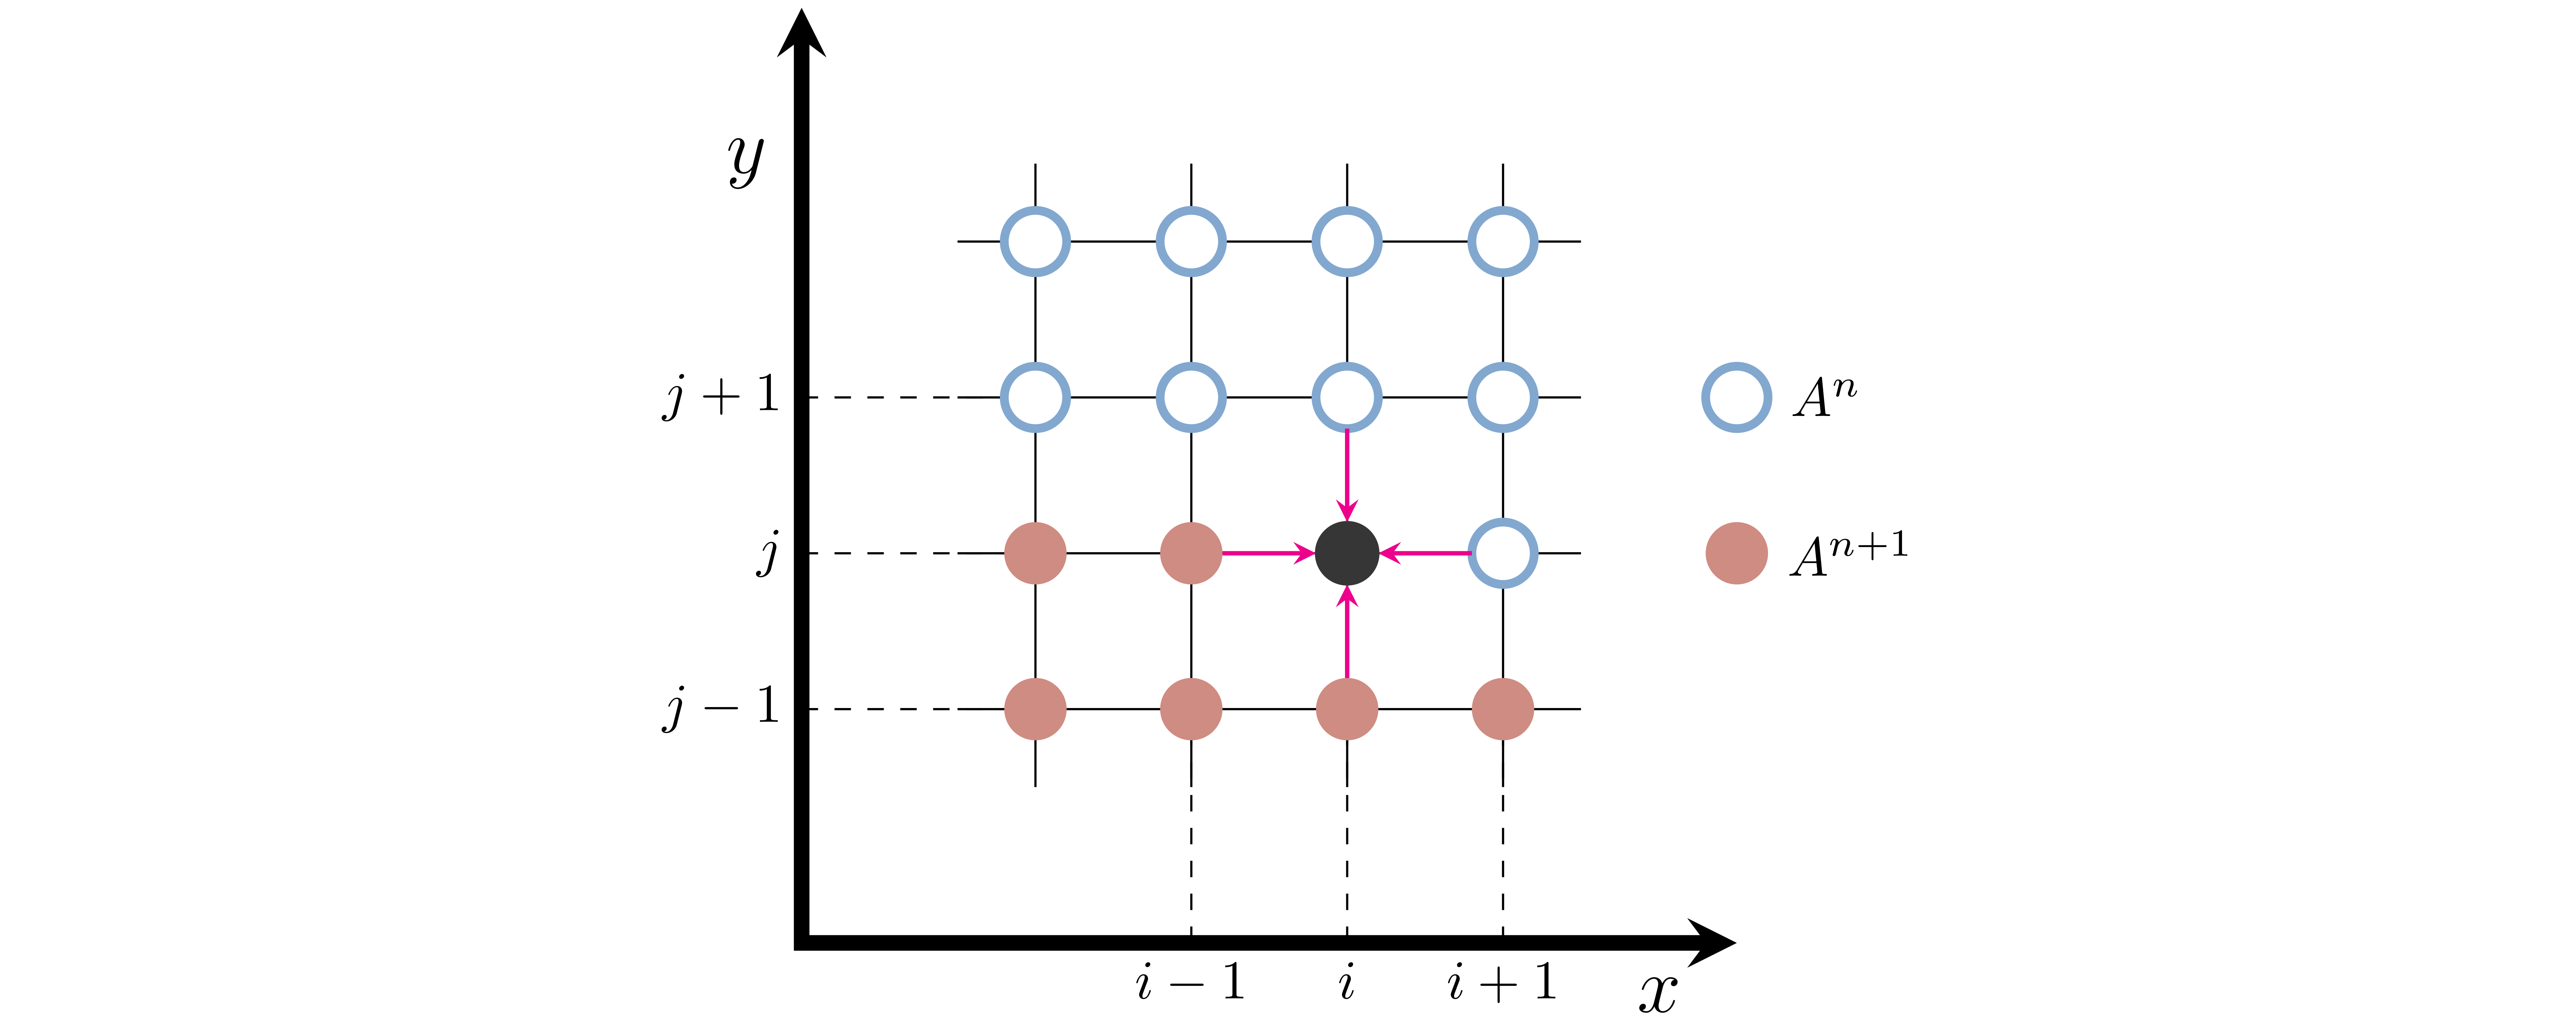

Wenn wir die Einträge in der Matrix $A_{i,j}$ etwa nacheinander Spalte für Spalte updaten, und pro Spalte Zeile für Zeile vorwärts wandern (oder umgekehrt, also Zeile für Zeile updaten), dann ergibt sich die obige Formel. Für die Implementierung hat das sogar den Vorteil, dass die Einträge der Matrix direkt überschrieben werden können, und die aktualisierte Matrix nicht zwischengespeichert werden muss.

## a) Implementierung in Julia

Implementieren Sie das Relaxationsverfahren für ein wählbares $\omega$ sowie allgemeine Randbedingungen als Julia-Funktion. Beschreiben Sie, inwiefern man in Ihrem Code die Randbedingungen übergeben und wählen kann.

## b) Das Sonnensegel im Innenhof des Physikgebäudes

Im Folgenden sollen Sie ihr Implementierung benutzen, um die Spanndächer verschiedener Bauwerke zu berechnen.
Betrachten Sie als erstes Beispiel die pavillonartige Konstruktion im Innenhof des Physikgebäudes. Näherungsweise hat diese einen quadratischen Grundriss, wobei gegenüberliegende Eckpunkt jeweils die gleiche Höhe haben. Die umrandende Metallkonstruktion zwingt die Seiten des Spanntuches auf Geraden, die zwischen den Eckpunkten unterschiedlicher Höhe interpolieren.

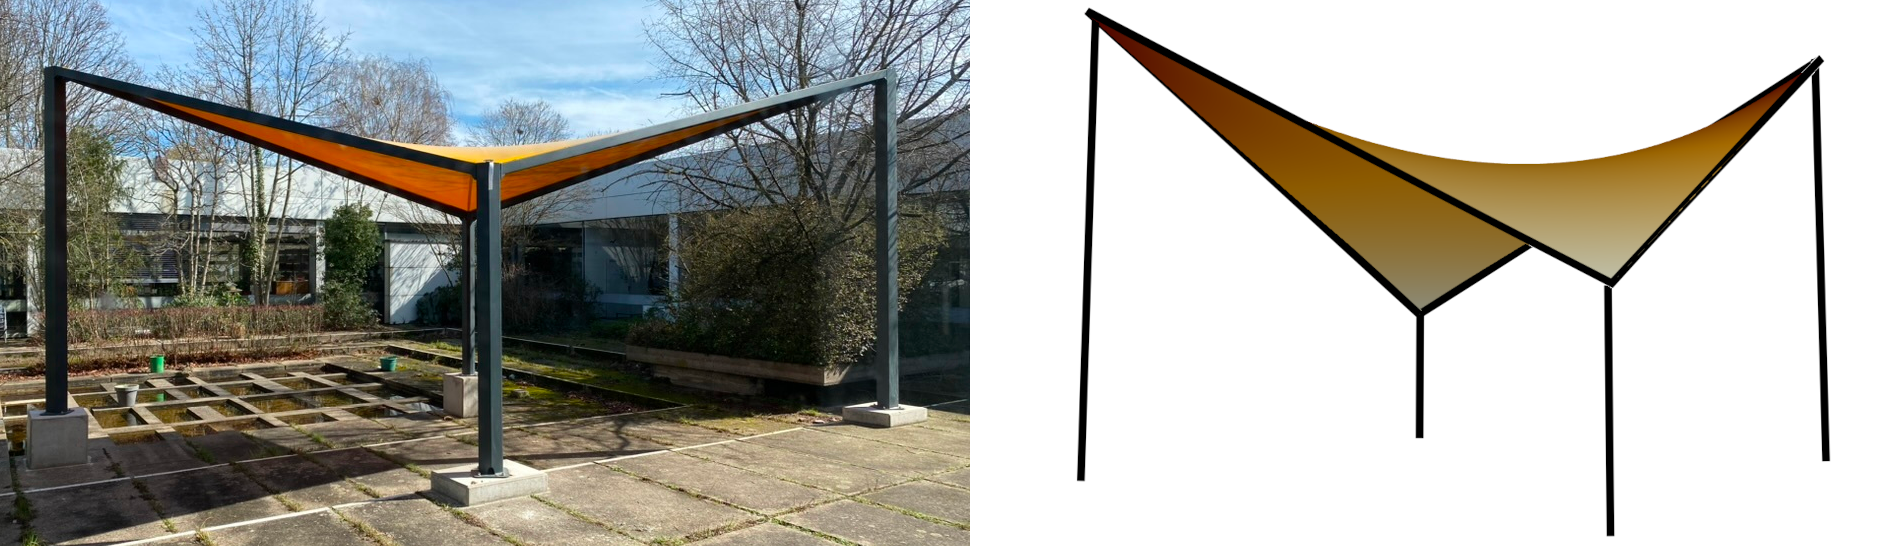

Verwenden Sie die Relaxationsmethode, um die Form des Spanntuches zu berechnen. Als Höhenunterschied zwischen benachbarten Eckpunkte bieten sich 20 Längeneinheiten an, als Seitenlänge des quadratischen Grundrisses 100 Längeneinheiten. Stellen Sie die Form des Tuches in einem dreidimensionalen Plot dar.

*Hinweis:* Sowohl `CairoMakie`, als auch `GLMakie` erlauben die Darstellung dreidimensionaler Abbildungen. `GLMakie` ist hierbei etwas ausgereifter. Probieren Sie etwa die folgenden Zeilen aus:
```julia
using GLMakie
f = [cos(x)*sin(y) for x in 0:0.1:2pi, y in 0:0.1:2pi]
fig = Figure()
ax = Axis3(fig[1,1])
surface!(ax, f)
display(fig)
```

## c) Der Kölner Hauptbahnhof

Der **Kölner Hauptbahnhof** soll im Jahr 2042 zu einem Kreuzungsbahnhof umgebaut werden. Das Gebäude soll einen quadratischen Grundriss haben und benötigt an allen vier Seiten eine Gleiszufahrt. Das Dach des Gebäudes soll an jeder Seite mittig ein Cosinus-förmiges Profil erhalten, um die Einfahrt zu ermöglichen, aber rechts und links davon genau mit der waagerechten Seitenmauer abschließen. Der Architekt bittet Sie nun, ein Profil des Daches zu berechnen, das die Oberfläche unter den gegebenen Bedingungen auf dem Rand minimiert.

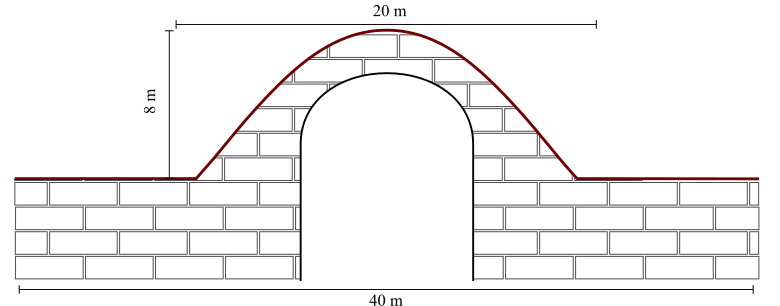


Planen Sie einen 40 m $\times$ 40 m großen Grundriss des Daches und legen Sie für die Gesamtbreite der Cosinus-Bögen 20 m, sowie als Höhe 8 m fest. Verwenden Sie die Relaxationsmethode, um das Dach zu berechnen und stellen Sie es in einem 3D-Plot mittels der Makie-Funktion `surface` dar. 

## d) Optional: Münchner Olympiastadion

Wenden Sie sich nun dem [**Dach des Münchner Olympia-Stadions**](https://de.wikipedia.org/wiki/Olympiadach) zu: Nehmen Sie dazu eine rechteckige Grundfläche von 100m $\times$ 200m an und entwerfen Sie geeignete Randbedingungen für Ihre Relaxation, die die Dachkonstruktion des Stadions (vereinfacht) darstellen. Sie können wie in der vorherigen Aufgabe trigonometrische Funktionen für den Rand des Daches verwenden, oder Pfeiler einer fixen Höhe in der Mitte des Daches. Stellen Sie die relaxierte Dachkonstruktion in einem dreidimensionalen Plot dar.

*Hinweis*: In dieser Aufgabe gibt es keine *richtigen* Randbedingungen, es ist viel mehr Ihre Aufgabe sich Funktionen zu überlegen, die den Bildern des Münchener Stadions nahe kommen und selber kreativ zu werden.

## e) Konvergenz der Relaxation

Untersuchen Sie, inwiefern Ihre Relaxation über verschiedene Iterationsschritte in Abhängigkeit von $\omega$ konvergiert. Dazu sollen Sie die Summe der Abweichungen von der letzten zur aktuellen Konfiguration betrachten, also

\begin{equation}
 \delta A^{(n)} = \sum_i \sum_j |A^{(n)}_{i,j}-A^{(n-1)}_{i,j}|
\end{equation}

und gegen die Iteration für $\omega \in \left[0.5,1,1.5,1.9 \right]$ auftragen.
Beurteilen Sie, wie die Wahl von $\omega$ die Konvergenz des Algorithmus beinflusst. Was passiert, wenn man $\omega > 2$ wählt?